# Jaynes-Cummings model using the Quantum package

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from quantum import *
from quantum.atom_cavity import *

In [3]:
from qutip.correlation import (spectrum, coherence_function_g1, spectrum_correlation_fft, coherence_function_g2)

In [4]:
%matplotlib inline

## System parameters 

In [5]:
N = 3  # Maximum excitation manifold

In [6]:
ωa = 1000  # Atom excitation energy
ωc = 995  # Cavity energy
g = 1.0  # Coupling constant
γ = 0.1  # Rate of atom spontaneous emission
κ = 5.0  # Rate of cavity photons leakage
Px = 1.0  # Atomic incoherent pumping

## Hamiltonian and colapse operators

In [29]:
st = states(N) # States basis truncated according to the maximim excitation manifold
k = kets(st) # The elemnts in kets are associated element to element to the elements in states

In [30]:
st

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [0, 2],
       [1, 2]])

In [9]:
a = destroy_a(st)
a_dag = a.dag()
σm = destroy_x(st)
σp = σm.dag()

In [10]:
H = ωa*σp*σm + ωc*a_dag*a + g*(a_dag*σm + a*σp)

In [11]:
c_op_list = [np.sqrt(κ)*a, np.sqrt(Px)*σp, np.sqrt(γ)*σm] # Collapse operators
# Dissipation due to spontaneous emission and leakage of cavity modes!

In [12]:
ψ0 = k[0] # initial state

## Quantum dynamics

## Numerical solution

In [13]:
tmax = 100

In [14]:
tlist = np.linspace(0, tmax, 10**4)

In [15]:
ρ =  mesolve(H, ψ0, tlist, c_op_list, progress_bar=True).states

10.0%. Run time:   0.13s. Est. time left: 00:00:00:01
20.0%. Run time:   0.25s. Est. time left: 00:00:00:00
30.0%. Run time:   0.35s. Est. time left: 00:00:00:00
40.0%. Run time:   0.46s. Est. time left: 00:00:00:00
50.0%. Run time:   0.57s. Est. time left: 00:00:00:00
60.0%. Run time:   0.69s. Est. time left: 00:00:00:00
70.0%. Run time:   0.80s. Est. time left: 00:00:00:00
80.0%. Run time:   0.91s. Est. time left: 00:00:00:00
90.0%. Run time:   1.03s. Est. time left: 00:00:00:00
Total run time:   1.14s


In [16]:
# Trace
tr = []
for i in range(len(tlist)):
        tr.append(ρ[i].tidyup().tr())

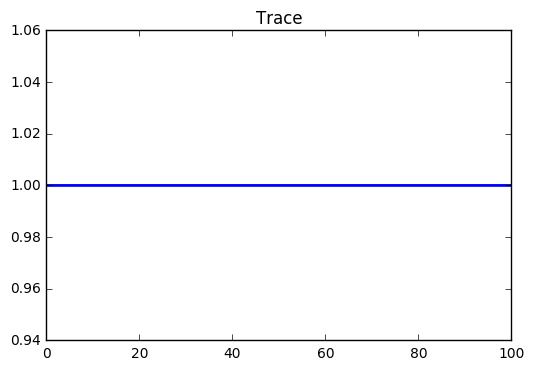

In [18]:
plt.plot(tlist, np.around(np.real(tr),decimals=10), lw=2)
plt.title('Trace');

In [19]:
# Populations
pop = [] 
for n in range(2*N):
    ρn = []
    for i in range(len(tlist)):
        ρn.append(ρ[i][n,n])
    pop.append(ρn)

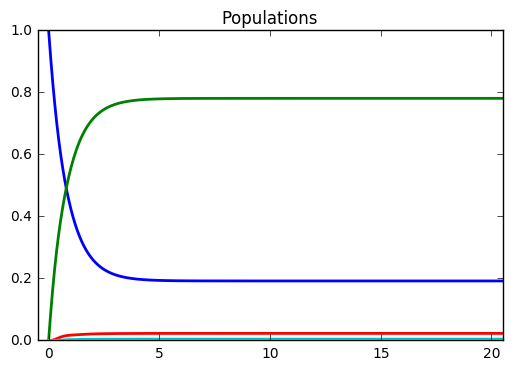

In [20]:
for n in range(2*N):
    plt.plot(tlist, np.real(pop[n]), lw=2)
plt.title('Populations')
plt.xlim([-0.5,20.5]);

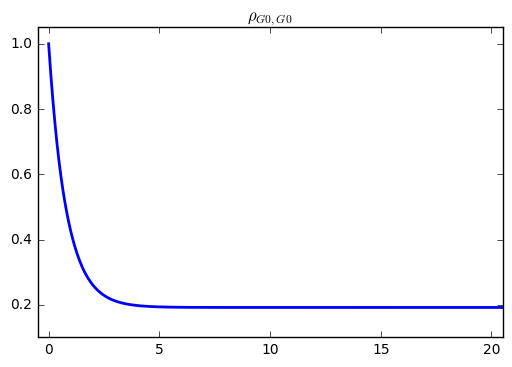

In [26]:
plt.plot(tlist, np.real(pop[0]), 'b', lw=2)
plt.xlim([-0.5,20.5])
plt.ylim([0.1,1.05]);
plt.title(r'$\rho_{G 0, G 0}$');

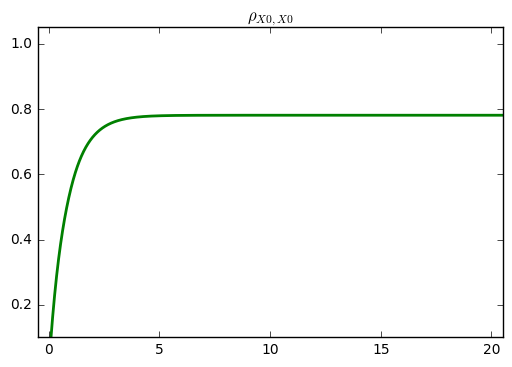

In [28]:
plt.plot(tlist, np.real(pop[1]), 'g', lw=2)
plt.xlim([-0.5,20.5])
plt.ylim([0.1,1.05]);
plt.title(r'$\rho_{X 0, X 0}$');

## Mean photon number

In [31]:
mean_a = mesolve(H, ψ0, tlist, c_op_list, [a.dag()*a], progress_bar=True).expect[0]

10.0%. Run time:   0.03s. Est. time left: 00:00:00:00
20.0%. Run time:   0.07s. Est. time left: 00:00:00:00
30.0%. Run time:   0.10s. Est. time left: 00:00:00:00
40.0%. Run time:   0.14s. Est. time left: 00:00:00:00
50.0%. Run time:   0.17s. Est. time left: 00:00:00:00
60.0%. Run time:   0.21s. Est. time left: 00:00:00:00
70.0%. Run time:   0.24s. Est. time left: 00:00:00:00
80.0%. Run time:   0.27s. Est. time left: 00:00:00:00
90.0%. Run time:   0.31s. Est. time left: 00:00:00:00
Total run time:   0.33s


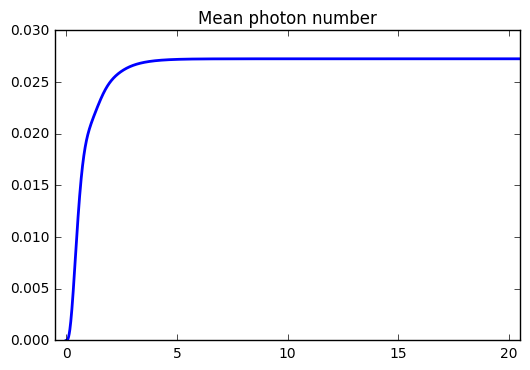

In [32]:
plt.plot(tlist, mean_a, lw=2)
plt.title('Mean photon number')
plt.xlim([-0.5,20.5]);

## Photoluminiscence spectrum 

### Laplace transform

In [27]:
ωlist = np.linspace(980, 1025, 100000)*(2*np.pi)

In [29]:
c_op_list_spec = [np.sqrt(2*np.pi*κ)*a, np.sqrt(2*np.pi*Px)*σm.dag(), np.sqrt(2*np.pi*γ)*σm] # Collapse operators

In [32]:
spec_es = spectrum(H*(2*np.pi), ωlist, c_op_list_spec, a.dag(), a, solver='es') # es: exponential series 

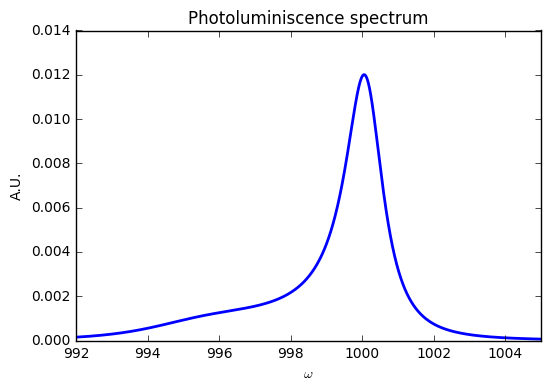

In [50]:
plt.plot(ωlist/(2*np.pi), abs(spec_es), 'b', lw=2)
plt.xlim([992,1005])
plt.xlabel(r'$\omega$')
plt.ylabel(r'A.U.')
plt.title('Photoluminiscence spectrum')

### Fourier transform 

In [34]:
taulist = np.linspace(0, 20, 2**16)

In [37]:
g1 = coherence_function_g1(H, None, taulist, c_op_list, a)

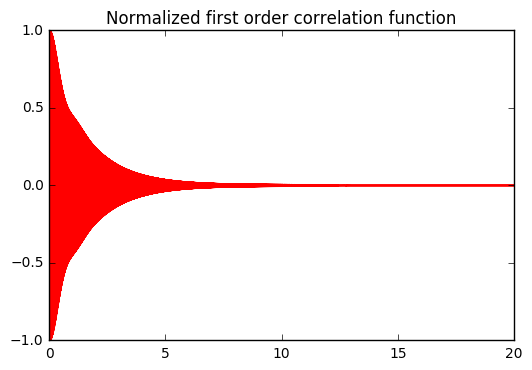

In [49]:
plt.plot(taulist, np.real(g1[0]), 'r', lw=2)
plt.title('Normalized first order correlation function')

In [43]:
wlista1,speca1= spectrum_correlation_fft(taulist, g1[1])

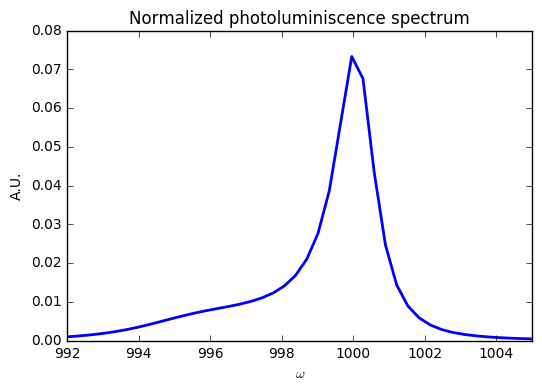

In [51]:
plt.plot(wlista1, speca1, 'b', lw=2)
plt.xlim([992,1005])
plt.xlabel(r'$\omega$')
plt.ylabel(r'A.U.')
plt.title('Normalized photoluminiscence spectrum')

## Second order correlation function

In [52]:
taulist = np.linspace(0, 20, 2**16)

In [54]:
g2 = coherence_function_g2(H, None, taulist, c_op_list, a) # taulist couldn't has negative elements

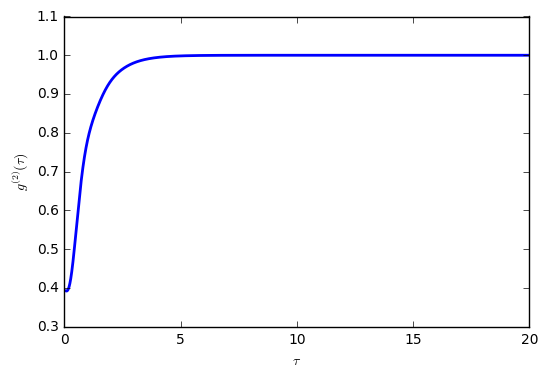

In [55]:
plt.plot(taulist,np.real(g2[0]), 'b', lw=2) #, xrange=[-999,1001])
plt.xlabel(r'$\tau$')
plt.ylabel(r'$g^{(2)}(\tau)$')
plt.title('Secong order correlation function')

In [56]:
g20 = abs(g2[0][0]) # g2 in τ=0

In [57]:
g20

0.39287121207651599